# Carga de Datos de Twitter

Este tutorial es una selección y adaptación al español del artículo [Twitter Analysis with Python using Tweepy — Getting Started](https://medium.com/analytics-vidhya/twitter-analysis-with-python-using-tweepy-getting-started-164af4fb667e) desarrollado por Kris Lee. 

En este tutorial vamos a usar la librería de software Tweepy para extraer tweets desde la API de Twitter. 

Esta admite la autenticación OAuth1 (aplicación-usuario) y OAuth 2 (solo aplicación). 

Antes de la autenticación, debes tener una cuenta de desarrollador de Twitter. Si no lo has hecho, puedes solicitarlo mediante este [enlace](https://developer.twitter.com/en). 

Obtener una cuenta de desarrollador de Twitter generalmente toma uno o dos días, o a veces más, para que Twitter revise su aplicación. Lo mejor es utilizar el correo PUCP para registrarte. 

Las siguientes líneas de código realizan el proceso de autenticación:

In [1]:
# Import the tweepy library
import tweepy as tw

# Variables that contains the user credentials to access Twitter API
consumer_key = "API key"
consumer_secret = "API secret key"
token = "Access token"
token_secret = "Access token secret"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(token, token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Recuerda reemplazar el texto de las variables `consumer_key`, `consumer_secret`, `token` y `token_secret` con los valores correspondientes a tus credenciales. Puedes seguir esta [guía](https://medium.com/analytics-vidhya/twitter-analysis-with-python-using-tweepy-getting-started-164af4fb667e).

Después de la autenticación, puedes usar tweepy para obtener texto. Para eso definimos nuestros parámetros de interés y la cantidad de tweets a recolectar:

In [88]:
# Parameters
search_words = "castillo"  # keyword or hashtag to search
date_until = "2022-08-02"  # upper limit of date to search
geo = "-12.046373,-77.042754,50km"  # geolocation code and radius in km
language = "es"  # language of tweets to extract

# Number of tweets to extract
n = 100

# Tweet extraction
tweets = tw.Cursor(
    api.search, q=search_words, lang=language, geocode=geo, until=date_until
).items(n)

Al momento de definir tus parámetros de búsqueda, ten en cuenta las siguientes consideraciones:

- Geocode: El código de geolocalización exacto puede ser obtenido con el servicio [Geocoder](https://developers.google.com/maps/documentation/utils/geocoder) de Google. En el ejemplo usamos el código de Lima Metropolitana (-12.046373,-77.042754) y se buscó en un radio de 50 kms.

- Lang: Para especificar el lenguaje, se utiliza el código ISO 639-1.

- Until: Devuelve los tweets creados antes de la fecha indicada. Ten en cuenta que el índice de búsqueda tiene un límite de 7 días. En otras palabras, no se encontrarán tweets para una fecha anterior a una semana.

Para más detalles, puedes revisar la [documentación](https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets).

Ahora que hemos extraído los tweets, vamos a colocarlos en una lista de Python extrayendo solo la información que consideramos relevante:

In [89]:
df = [
    [
        tweet.id,
        tweet.text,
        tweet.user.screen_name,
        tweet.user.followers_count,
        tweet.favorite_count,
        tweet.retweet_count,
        tweet.user.location,
        str(tweet.created_at),
    ]
    for tweet in tweets
]

Hay más información que puedes extraer de cada tweet. Para saber más, revisa la [documentación](https://docs.tweepy.org/en/latest/api.html#tweepy-api-twitter-api-wrapper).

El próximo paso es colocar la información extraída en un Data Frame de Pandas. Se trata de una estructura de datos que nos permitirá manipular la información con mayor facilidad.

In [105]:
import pandas as pd

raw_df = pd.DataFrame(
    df,
    columns=[
        "id",
        "text",
        "user",
        "user_followers",
        "favorite_count",
        "retweet_count",
        "location",
        "datetime",
    ],
)
raw_df

,id,text,user,user_followers,favorite_count,retweet_count,location,datetime
0,1554255636589907968,"🔵🔴El ministro de Cultura, Alejandro Salas, inf...",exitosape,776025,264,50,"Lima, Peru",2022-08-01 23:59:55
1,1554255583125053441,"🔴🔵El abogado de Pedro Castillo, Benji Espinoza...",exitosape,776025,2,2,"Lima, Peru",2022-08-01 23:59:42
2,1554255574413582336,@GabrielDeledda No es defender a Castillo...es...,EVELARDEN,226,0,0,"Surco, Peru",2022-08-01 23:59:40
3,1554255319521316864,Pedro Castillo: Fiscalía de la Nación ahora le...,tuitperuano,8643,0,0,"Lima, Peru",2022-08-01 23:58:39
4,1554255315402498048,Pedro Castillo: Fiscalía de la Nación ahora le...,rppnoticiasperu,422,0,0,"Lima, Peru",2022-08-01 23:58:38
...,...,...,...,...,...,...,...,...
95,1554245777844801536,"@PTV_Noticias Al chato, lunarejo galvez y chin...",mustafa33p,167,0,0,"Lima, Peru",2022-08-01 23:20:44
96,1554245695967739904,"📌 El presidente de la República, Pedro Castill...",somosnativa,21868,0,0,"San isidro, Peru",2022-08-01 23:20:25
97,1554245684945100803,@Bancada_IyD @FlorPabloMedina @suselparedes @H...,WalterF59274559,540,14,1,"Lima, Peru",2022-08-01 23:20:22
98,1554245650673442816,Pregúntale a la fiscalía q acaba de ampliar la...,ElMonoReyesM,291,0,0,Lima - Perú,2022-08-01 23:20:14


Puede que algunos tweets sean duplicados, por lo que conviene eliminar los registros duplicados utilizando la función `drop_duplicates`:

In [106]:
raw_df.drop_duplicates(subset=["text"], inplace=True)

In [107]:
raw_df

,id,text,user,user_followers,favorite_count,retweet_count,location,datetime
0,1554255636589907968,"🔵🔴El ministro de Cultura, Alejandro Salas, inf...",exitosape,776025,264,50,"Lima, Peru",2022-08-01 23:59:55
1,1554255583125053441,"🔴🔵El abogado de Pedro Castillo, Benji Espinoza...",exitosape,776025,2,2,"Lima, Peru",2022-08-01 23:59:42
2,1554255574413582336,@GabrielDeledda No es defender a Castillo...es...,EVELARDEN,226,0,0,"Surco, Peru",2022-08-01 23:59:40
3,1554255319521316864,Pedro Castillo: Fiscalía de la Nación ahora le...,tuitperuano,8643,0,0,"Lima, Peru",2022-08-01 23:58:39
4,1554255315402498048,Pedro Castillo: Fiscalía de la Nación ahora le...,rppnoticiasperu,422,0,0,"Lima, Peru",2022-08-01 23:58:38
...,...,...,...,...,...,...,...,...
95,1554245777844801536,"@PTV_Noticias Al chato, lunarejo galvez y chin...",mustafa33p,167,0,0,"Lima, Peru",2022-08-01 23:20:44
96,1554245695967739904,"📌 El presidente de la República, Pedro Castill...",somosnativa,21868,0,0,"San isidro, Peru",2022-08-01 23:20:25
97,1554245684945100803,@Bancada_IyD @FlorPabloMedina @suselparedes @H...,WalterF59274559,540,14,1,"Lima, Peru",2022-08-01 23:20:22
98,1554245650673442816,Pregúntale a la fiscalía q acaba de ampliar la...,ElMonoReyesM,291,0,0,Lima - Perú,2022-08-01 23:20:14


Ahora procedemos a extraer el texto de los tweets. Para ello, limpiamos RTs, enlaces y caracteres de puntuación. Además, conviertimos el texto a minúsculas.

In [109]:
import re
from unicodedata import normalize

# Removing RT, Punctuation, etc
remove_rt = lambda x: re.sub("RT @\w+: ", " ", x)
remove_tilde = lambda x: re.sub(
    r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+",
    r"\1",
    normalize("NFD", x),
    0,
    re.I,
)
rt = lambda x: re.sub(
    "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x
)

clean_df = raw_df.copy()
clean_df["text"] = clean_df.text.map(remove_rt).map(remove_tilde).map(rt)
clean_df["text"] = clean_df.text.str.lower()
clean_df

,id,text,user,user_followers,favorite_count,retweet_count,location,datetime
0,1554255636589907968,el ministro de cultura alejandro salas inf...,exitosape,776025,264,50,"Lima, Peru",2022-08-01 23:59:55
1,1554255583125053441,el abogado de pedro castillo benji espinoza...,exitosape,776025,2,2,"Lima, Peru",2022-08-01 23:59:42
2,1554255574413582336,no es defender a castillo es defender su s...,EVELARDEN,226,0,0,"Surco, Peru",2022-08-01 23:59:40
3,1554255319521316864,pedro castillo fiscalia de la nacion ahora le...,tuitperuano,8643,0,0,"Lima, Peru",2022-08-01 23:58:39
4,1554255315402498048,pedro castillo fiscalia de la nacion ahora le...,rppnoticiasperu,422,0,0,"Lima, Peru",2022-08-01 23:58:38
...,...,...,...,...,...,...,...,...
95,1554245777844801536,noticias al chato lunarejo galvez y china l...,mustafa33p,167,0,0,"Lima, Peru",2022-08-01 23:20:44
96,1554245695967739904,el presidente de la republica pedro castill...,somosnativa,21868,0,0,"San isidro, Peru",2022-08-01 23:20:25
97,1554245684945100803,iyd acunap plop esto solo d...,WalterF59274559,540,14,1,"Lima, Peru",2022-08-01 23:20:22
98,1554245650673442816,preguntale a la fiscalia q acaba de ampliar la...,ElMonoReyesM,291,0,0,Lima - Perú,2022-08-01 23:20:14


Ahora que nuestro Data Frame está listo, procedemos a guardarlo en un archivo `.csv`:

In [110]:
# Save clean Data Frame to CSV
clean_df.to_csv(r"extracted_tweets.csv", index=False)

## BONUS

Ahora puedes prepararte para crear una nube de palabras para que puedas darte cuenta de cuáles son las palabras más utilizadas en estos tweets. Para ello, primero definamos una función a continuación:

In [ ]:
!wget "https://github.com/renatoparedes/IntroPythonInvestigacionPsicologia/raw/master/AnalisisdeDatosCualitativos/cloud.png"

In [111]:
# Function to Create Wordcloud
import nltk
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords

nltk.download("stopwords")


def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    mystopwords = set(stopwords.words("spanish", "english"))
    wc = WordCloud(
        background_color="white",
        mask=mask,
        max_words=3000,
        stopwords=mystopwords,
        collocations=False,
    )
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path = "wc.png"
    display(Image.open(path))

[nltk_data] Downloading package stopwords to /home/renato/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ahora estamos listos para crear nuestra nube:

Word Cloud Saved Successfully


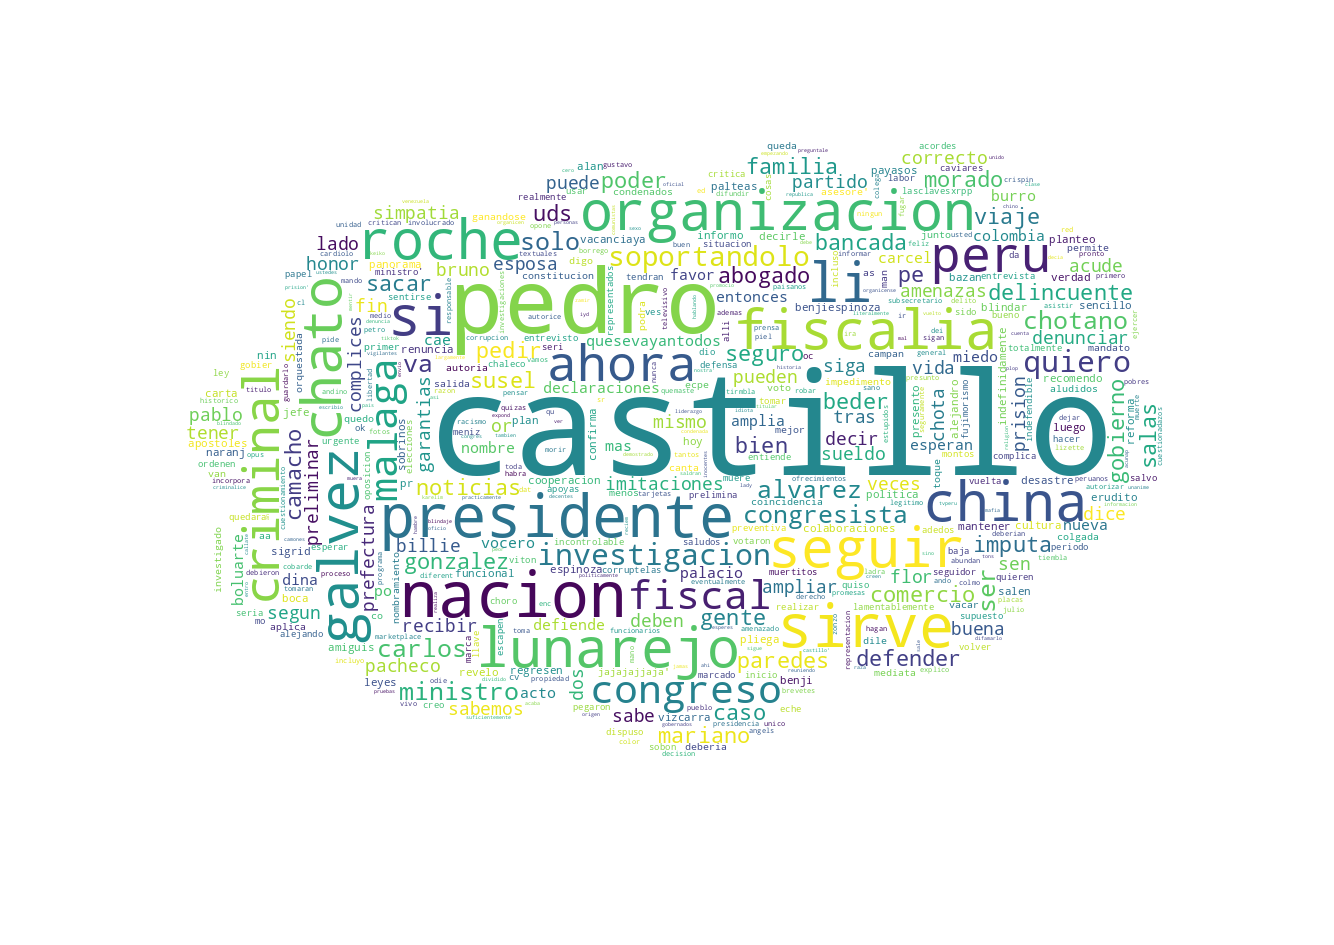

In [112]:
# Creating wordcloud for all tweets
create_wordcloud(clean_df["text"].values)

Si tienes tiempo, te invito a revisar formas avanzadas (premium) de realizar búsquedas en twitter en el siguiente [enlace](https://towardsdatascience.com/how-to-use-twitter-premium-search-apis-for-mining-tweets-2705bbaddca). 